# Actual Flip-Angle Imaging

\begin{equation}
M_{z1} = M_{0}\frac{1-e^{\frac{-TR_2}{T_1}}+\left(1-e^{\frac{-TR_1}{T_1}}\right)e^{\frac{-TR_2}{T_1}}\cos(\theta)}{1-e^{\frac{-TR_1}{T_1}}e^{\frac{-TR_2}{T_1}}\cos^{2}(\theta)}\sin(\theta)
\end{equation}

\begin{equation}
M_{z2} = M_{0}\frac{1-e^{\frac{-TR_1}{T_1}}+\left(1-e^{\frac{-TR_2}{T_1}}\right)e^{\frac{-TR_1}{T_1}}\cos(\theta)}{1-e^{\frac{-TR_1}{T_1}}e^{\frac{-TR_2}{T_1}}\cos^{2}(\theta)}\sin(\theta)
\end{equation}

\begin{equation}
r = \frac{S_2}{S_1} = \frac{1-e^{\frac{-TR_1}{T_1}}+\left(1-e^{\frac{-TR_2}{T_1}}\right)e^{\frac{-TR_1}{T_1}}\cos(\theta)}{1-e^{\frac{-TR_2}{T_1}}+\left(1-e^{\frac{-TR_1}{T_1}}\right)e^{\frac{-TR_2}{T_1}}\cos(\theta)}
\end{equation}

\begin{equation}
r\approx\frac{1+n\cos(\theta)}{n+\cos(\theta)}
\end{equation}

\begin{equation}
\theta\approx\arccos\left(\frac{rn-1}{n-r}\right)
\end{equation}

\begin{equation}
S_{1} = M_{z1}e^{\frac{-TE}{T_{2}^{*}}}\sin(\alpha)
\end{equation}

\begin{equation}
S_{2} = M_{z2}e^{\frac{-TE}{T_{2}^{*}}}\sin(\alpha)
\end{equation}

#### Complete analtical equation:

#### First order approximation (n=TR2/TR1):

\begin{equation}
S(\alpha)=cgM_{0}\frac{1-e^{\frac{-TR}{T1}}}{1-e^{\frac{-TR}{T1}}\cos(\alpha_{nom})}\sin(\alpha_{nom})e^{\frac{-TE}{T_{2}^{*}}}
\end{equation}

## Signal modelling

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

In [17]:
def Signal_function(TR1):
    M0 = 1000;
    flip_angles = np.arange(10,110,10); #Flip angles
    flip_angles = flip_angles*np.pi/180; #In radians for computation
    T1_wm = 900; #ms
    T1_gm = 1500; #ms
    T1_csf = 4000; #ms
    TE = 3.5; #ms
    TR2 = 5*TR1;
    #TR1 = np.arange(30,30,20,20,20); #ms
    #TR2 = np.arange(60,90,80,100,120); #ms
    #n = np.divide(TR2,TR1);

    #Longitudinal magnetization and signal (white matter)
    Mz1_wm = M0*((1 - np.exp(-TR2/T1_wm) + (1 - np.exp(-TR1/T1_wm))*np.exp(-TR2/T1_wm)*np.cos(flip_angles))/(1 - np.exp(-TR1/T1_wm)*np.exp(-TR2/T1_wm)*np.cos(flip_angles)*np.cos(flip_angles)));
    Mz2_wm = M0*((1 - np.exp(-TR1/T1_wm) + (1 - np.exp(-TR2/T1_wm))*np.exp(-TR1/T1_wm)*np.cos(flip_angles))/(1 - np.exp(-TR1/T1_wm)*np.exp(-TR2/T1_wm)*np.cos(flip_angles)*np.cos(flip_angles)));

    S1_wm = Mz1_wm*0.8*np.sin(flip_angles);
    S2_wm = Mz2_wm*0.8*np.sin(flip_angles);

    #Normalizing at 20°
    S1_norm_wm = S1_wm/S1_wm[1];
    S2_norm_wm = S2_wm/S1_wm[1];
    
    #Longitudinal magnetization and signal (gray matter)
    Mz1_gm = M0*((1 - np.exp(-TR2/T1_gm) + (1 - np.exp(-TR1/T1_gm))*np.exp(-TR2/T1_gm)*np.cos(flip_angles))/(1 - np.exp(-TR1/T1_gm)*np.exp(-TR2/T1_gm)*np.cos(flip_angles)*np.cos(flip_angles)));
    Mz2_gm = M0*((1 - np.exp(-TR1/T1_gm) + (1 - np.exp(-TR2/T1_gm))*np.exp(-TR1/T1_gm)*np.cos(flip_angles))/(1 - np.exp(-TR1/T1_gm)*np.exp(-TR2/T1_gm)*np.cos(flip_angles)*np.cos(flip_angles)));

    S1_gm = Mz1_gm*0.8*np.sin(flip_angles);
    S2_gm = Mz2_gm*0.8*np.sin(flip_angles);

    S1_norm_gm = S1_gm/S1_gm[1];
    S2_norm_gm = S2_gm/S1_gm[1];
    
    #Longitudinal magnetization and signal (cerebrospinal fluid matter)
    Mz1_csf = M0*((1 - np.exp(-TR2/T1_csf) + (1 - np.exp(-TR1/T1_csf))*np.exp(-TR2/T1_csf)*np.cos(flip_angles))/(1 - np.exp(-TR1/T1_csf)*np.exp(-TR2/T1_csf)*np.cos(flip_angles)*np.cos(flip_angles)));
    Mz2_csf = M0*((1 - np.exp(-TR1/T1_csf) + (1 - np.exp(-TR2/T1_csf))*np.exp(-TR1/T1_csf)*np.cos(flip_angles))/(1 - np.exp(-TR1/T1_csf)*np.exp(-TR2/T1_csf)*np.cos(flip_angles)*np.cos(flip_angles)));

    S1_csf = Mz1_csf*0.8*np.sin(flip_angles);
    S2_csf = Mz2_csf*0.8*np.sin(flip_angles);

    S1_norm_csf = S1_csf/S1_csf[1];
    S2_norm_csf = S2_csf/S1_csf[1];

    #Signal intensities (normalized at 20°) vs angle, ranging from 10 to 110 degrees
    #TR1 and TR2 parameters are passed to the function
    s1_wm = plt.plot(np.arange(10,110,10), S1_norm_wm, color='blue', ls='dashed', label='$T_1$ = 0.9 s (Signal 1)')
    plt.xlabel('Flip angles '  r'($\theta$)')
    plt.ylabel('Normalized signal intensities')
    plt.ylim(0,1.4)
    plt.xlim(0,110)
    s2_wm = plt.plot(np.arange(10,110,10), S2_norm_wm, color='blue', label='$T_1$ = 0.9 s (Signal 2)')
    
    s1_gm = plt.plot(np.arange(10,110,10), S1_norm_gm, color='orange', ls='dashed', label='$T_1$ = 1.5 s (Signal 1)')
    s2_gm = plt.plot(np.arange(10,110,10), S2_norm_gm, color='orange', label='$T_1$ = 1.5 s (Signal 2)')
    
    s1_csf = plt.plot(np.arange(10,110,10), S1_norm_csf, color='green', ls='dashed', label='$T_1$ = 4.0 s (Signal 1)')
    s2_csf = plt.plot(np.arange(10,110,10), S2_norm_csf, color='green', label='$T_1$ = 4.0 s (Signal 2)')

    
    leg = plt.legend(loc=1, fontsize='medium', frameon=True)
    leg.get_frame().set_linewidth(1)
    TR1 = widgets.FloatSlider(min=10, max=50, value=20, description='TR<sub>1<sub>:')
    
widgets.interact(Signal_function, TR1=TR1)
display(TR1)


NameError: name 'TR1' is not defined

## r ratio simulations

#### Effect of T1

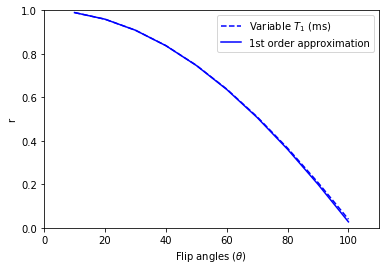

<function __main__.T1simulations(T1)>

In [6]:
def T1simulations(T1):
    M0 = 1000;
    flip_angles = np.arange(10,110,10); #Flip angles
    flip_angles = flip_angles*np.pi/180; #In radians for computation
    TE = 3.5; #ms
    TR1 = 20; #ms
    TR2 = 100; #ms
    n = TR2/TR1; #fixed ratio

    #Longitudinal magnetization and signal (white matter)
    Mz1 = M0*((1 - np.exp(-TR2/T1) + (1 - np.exp(-TR1/T1))*np.exp(-TR2/T1)*np.cos(flip_angles))/(1 - np.exp(-TR1/T1)*np.exp(-TR2/T1)*np.cos(flip_angles)*np.cos(flip_angles)));
    Mz2 = M0*((1 - np.exp(-TR1/T1) + (1 - np.exp(-TR2/T1))*np.exp(-TR1/T1)*np.cos(flip_angles))/(1 - np.exp(-TR1/T1)*np.exp(-TR2/T1)*np.cos(flip_angles)*np.cos(flip_angles)));

    S1 = Mz1*0.8**np.sin(flip_angles);
    S2 = Mz2*0.8**np.sin(flip_angles);
    
    #r ratio
    r = np.divide(S2,S1)
    r_app = np.divide(1 + n*np.cos(flip_angles),n + np.cos(flip_angles))

    #Signal intensities (normalized at 20°) vs angle, ranging from 10 to 110 degrees
    #TR1 and TR2 parameters are passed to the function
    f = plt.plot(np.arange(10,110,10), r, color='blue', ls='dashed', label='Variable $T_1$ (ms)')
    plt.xlabel('Flip angles '  r'($\theta$)')
    plt.ylabel('r')
    plt.ylim(0,1)
    plt.xlim(0,110)
    f_app = plt.plot(np.arange(10,110,10), r_app, color='blue', label='1st order approximation')
    
    leg = plt.legend(loc=1, fontsize='medium', frameon=True)
    leg.get_frame().set_linewidth(1)
    
interact(T1simulations, T1=(200,2000,200))

#### Effect of TR1

In [10]:
def TR1simulations(TR1):
    M0 = 1000;
    flip_angles = np.arange(10,110,10); #Flip angles
    flip_angles = flip_angles*np.pi/180; #In radians for computation
    TE = 3.5; #ms
    T1 = 500; #ms
    n = 5; #TR2/TR1: fix ratio 5

    #Longitudinal magnetization and signal (white matter)
    Mz1 = M0*((1 - np.exp(-n*TR1/T1) + (1 - np.exp(-TR1/T1))*np.exp(-n*TR1/T1)*np.cos(flip_angles))/(1 - np.exp(-TR1/T1)*np.exp(-n*TR1/T1)*np.cos(flip_angles)*np.cos(flip_angles)));
    Mz2 = M0*((1 - np.exp(-TR1/T1) + (1 - np.exp(-n*TR1/T1))*np.exp(-TR1/T1)*np.cos(flip_angles))/(1 - np.exp(-TR1/T1)*np.exp(-n*TR1/T1)*np.cos(flip_angles)*np.cos(flip_angles)));

    S1 = Mz1*0.8**np.sin(flip_angles);
    S2 = Mz2*0.8**np.sin(flip_angles);
    
    #r ratio
    r = np.divide(S2,S1)
    r_app = np.divide(1 + n*np.cos(flip_angles),n + np.cos(flip_angles))

    #Signal intensities (normalized at 20°) vs angle, ranging from 10 to 110 degrees
    #TR1 and TR2 parameters are passed to the function
    f = plt.plot(np.arange(10,110,10), r, color='blue', ls='dashed', label='Variable $TR1$ (ms) fixed n=5')
    plt.xlabel('Flip angles '  r'($\theta$)')
    plt.ylabel('r')
    plt.ylim(0,1)
    plt.xlim(0,110)
    f_app = plt.plot(np.arange(10,110,10), r_app, color='blue', label='1st order approximation')
    
    leg = plt.legend(loc=1, fontsize='medium', frameon=True)
    leg.get_frame().set_linewidth(1)
    
interact(TR1simulations, TR1=(10,60,10))

interactive(children=(IntSlider(value=30, description='TR1', max=60, min=10, step=10), Output()), _dom_classes…

<function __main__.TR1simulations(TR1)>

#### Effect of n

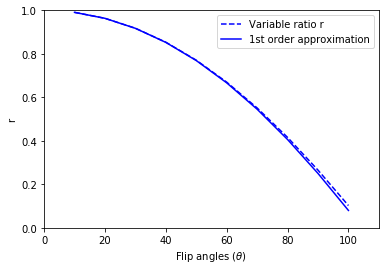

<function __main__.nSimulations(n)>

In [7]:
def nSimulations(n):
    M0 = 1000;
    flip_angles = np.arange(10,110,10); #Flip angles
    flip_angles = flip_angles*np.pi/180; #In radians for computation
    TE = 3.5; #ms
    T1 = 500; #ms
    TR1 = 20; #ms (fixed)
    TR2 = n*TR1;

    #Longitudinal magnetization and signal
    Mz1 = M0*((1 - np.exp(-TR2/T1) + (1 - np.exp(-TR2/(n*T1)))*np.exp(-TR2/T1)*np.cos(flip_angles))/(1 - np.exp(-TR2/(n*T1))*np.exp(-TR2/T1)*np.cos(flip_angles)*np.cos(flip_angles)));
    Mz2 = M0*((1 - np.exp(-TR2/(n*T1)) + (1 - np.exp(-TR2/T1))*np.exp(-TR2/(n*T1))*np.cos(flip_angles))/(1 - np.exp(-TR2/(n*T1))*np.exp(-TR2/T1)*np.cos(flip_angles)*np.cos(flip_angles)));

    S1 = Mz1*0.8**np.sin(flip_angles);
    S2 = Mz2*0.8**np.sin(flip_angles);
    
    #r ratio
    r = np.divide(S2,S1)
    r_app = np.divide(1 + np.multiply(n,np.cos(flip_angles)),n + np.cos(flip_angles))


    #Signal intensities (normalized at 20°) vs angle, ranging from 10 to 110 degrees
    #TR1 and TR2 parameters are passed to the function
    f = plt.plot(np.arange(10,110,10), r, color='blue', ls='dashed', label='Variable ratio r')
    plt.xlabel('Flip angles '  r'($\theta$)')
    plt.ylabel('r')
    plt.ylim(0,1)
    plt.xlim(0,110)
    f_app = plt.plot(np.arange(10,110,10), r_app, color='blue', label='1st order approximation')
    
    leg = plt.legend(loc=1, fontsize='medium', frameon=True)
    leg.get_frame().set_linewidth(1)
    
TR1 = 20; #ms
TR2 = np.arange(40,140,20); #ms
n = TR2/TR1;
interact(nSimulations, n=(2,6,1))